In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("cellpainting-labelled-mols-index.csv")
df

,Unnamed: 0,SAMPLE_KEY,BROAD_ID,PLATE_ID,WELL_POSITION,SITE,SAMPLE_ID,CPD_NAME,CPD_NAME_TYPE,SMILES,INCHIKEY,IMG_ERSyto,IMG_ERSytoBleed,IMG_Hoechst,IMG_Mito,IMG_Ph_golgi,IMG_CNT_CELLS,ROW_NR_LABEL_MAT
0,0,24277-A03-1,BRD-K18438502-001-02-6,24277,A03,1,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,JVIXPWIEOVZVJC-BQYQJAHWSA-N,cdp2bioactives_a03_s1_w231f9951f-53de-474a-ad6...,cdp2bioactives_a03_s1_w312dfdf5a-1e8a-4968-aee...,cdp2bioactives_a03_s1_w1ab716b51-382f-4feb-98c...,cdp2bioactives_a03_s1_w5ec0911ca-40be-4182-a23...,cdp2bioactives_a03_s1_w45063dcc7-2747-4a41-889...,132,942
1,1,24277-A03-2,BRD-K18438502-001-02-6,24277,A03,2,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,JVIXPWIEOVZVJC-BQYQJAHWSA-N,cdp2bioactives_a03_s2_w24b9010c1-d623-4649-a3b...,cdp2bioactives_a03_s2_w3bf25e0aa-bc91-43f3-b71...,cdp2bioactives_a03_s2_w1931abfbb-5a67-4365-bca...,cdp2bioactives_a03_s2_w5bdcc8c47-147d-4bd7-851...,cdp2bioactives_a03_s2_w4456e375f-65bb-4bb3-84c...,93,942
2,2,24277-A03-3,BRD-K18438502-001-02-6,24277,A03,3,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,JVIXPWIEOVZVJC-BQYQJAHWSA-N,cdp2bioactives_a03_s3_w249536212-978f-4433-b3e...,cdp2bioactives_a03_s3_w33e2d3c3c-215f-4156-b73...,cdp2bioactives_a03_s3_w1eba0b6dc-6e80-430d-a03...,cdp2bioactives_a03_s3_w5d878a344-7dfd-4709-b42...,cdp2bioactives_a03_s3_w4014018a9-4dd8-4e54-a64...,78,942
3,3,24277-A03-4,BRD-K18438502-001-02-6,24277,A03,4,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,JVIXPWIEOVZVJC-BQYQJAHWSA-N,cdp2bioactives_a03_s4_w2c046b63d-7c3c-48f7-ae6...,cdp2bioactives_a03_s4_w3d0f4f77e-f0d9-4138-85e...,cdp2bioactives_a03_s4_w10dbf02a7-1a82-479d-a89...,cdp2bioactives_a03_s4_w5e85c65c2-371d-4410-a70...,cdp2bioactives_a03_s4_w4b1c19eda-60f6-4076-8d7...,150,942
4,4,24277-A03-5,BRD-K18438502-001-02-6,24277,A03,5,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,JVIXPWIEOVZVJC-BQYQJAHWSA-N,cdp2bioactives_a03_s5_w237525021-b8ac-467a-ba0...,cdp2bioactives_a03_s5_w3546e47b2-7d7d-4c1d-868...,cdp2bioactives_a03_s5_w1681c79ee-ec36-442d-87f...,cdp2bioactives_a03_s5_w540fe507e-7881-4027-b7d...,cdp2bioactives_a03_s5_w40866a906-7523-4ba8-b67...,99,942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284029,56788,26795-O06-2,BRD-K27682976-001-01-7,26795,O06,2,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,QHTRHHVBBSPOHC-SFYKDHMMSA-N,cdp2w13_o06_s2_w279fa5e2c-2010-48de-8dc8-4cdcf...,cdp2w13_o06_s2_w3665b2978-4d0c-491a-a101-d5d72...,cdp2w13_o06_s2_w1596d8f9f-057c-4250-b4f1-cedf1...,cdp2w13_o06_s2_w5d4743f3d-e3ea-47e8-908a-540d4...,cdp2w13_o06_s2_w47b3295cc-407c-449c-96eb-2ffdb...,100,9829
284030,56789,26795-O06-3,BRD-K27682976-001-01-7,26795,O06,3,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,QHTRHHVBBSPOHC-SFYKDHMMSA-N,cdp2w13_o06_s3_w24dbe9916-4e90-40a0-add7-d185b...,cdp2w13_o06_s3_w39f3d23a4-d567-471b-bda0-371ae...,cdp2w13_o06_s3_w1cd3613d0-dec2-40a5-895e-2bd12...,cdp2w13_o06_s3_w5f587c0b0-a1b7-4021-a953-2b428...,cdp2w13_o06_s3_w40510b8c5-d993-40fd-b219-6fde7...,84,9829
284031,56790,26795-O06-4,BRD-K27682976-001-01-7,26795,O06,4,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,QHTRHHVBBSPOHC-SFYKDHMMSA-N,cdp2w13_o06_s4_w296b8ffc2-bff9-4ef9-8c85-5983a...,cdp2w13_o06_s4_w33bd00560-53de-4cce-b884-f4f92...,cdp2w13_o06_s4_w16a5e5561-645c-4051-86b2-ec379...,cdp2w13_o06_s4_w5f3a746e9-5398-4588-8cf0-ef57e...,cdp2w13_o06_s4_w4534fe40f-156c-40c2-bc62-6fe2f...,70,9829
284032,56791,26795-O06-5,BRD-K27682976-001-01-7,26795,O06,5,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,QHTRHHVBBSPOHC-SFYKDHMMSA-N,cdp2w13_o06_s5_w2b65f57a7-7357-4833-b4fb-f87de...,cdp2w13_o06_s5_w3acf2edf3-0fd6-4063-a7d1-8e7aa...,cdp2w13_o06_s5_w172cf5443-93c7-456e-bb9f-5c7e6...,cdp2w13_o06_s5_w54fa2cd42-75ce-4fde-9667

In [6]:
df.INCHIKEY.nunique()

10574

In [7]:
df.IMG_ERSyto[0]

'cdp2bioactives_a03_s1_w231f9951f-53de-474a-ad66-999c7ebc051e'

In [8]:
import torch

# Load the .pt file
data = torch.load("cellpainting-labelled-mols-features.pt")

# Check the content
print(type(data))
print(data)


<class 'numpy.ndarray'>
[[-0.0437   0.155   -0.02881 ... -0.08     0.01585  0.1244 ]
 [-0.0805   0.1592   0.0563  ... -0.07416 -0.00827  0.05408]
 [-0.151    0.2334   0.1383  ... -0.0658  -0.03653  0.1079 ]
 ...
 [ 0.04468  0.251    0.01108 ... -0.1377   0.0867  -0.10925]
 [ 0.02405  0.1807  -0.03506 ... -0.0822   0.05804 -0.0737 ]
 [ 0.03482  0.204   -0.04608 ... -0.1385   0.0838  -0.0857 ]]


In [9]:
data.shape

(284034, 512)

In [10]:
# Convert the tensor to a Pandas DataFrame
tensor_df = pd.DataFrame(data)
tensor_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.043701,0.155029,-0.028809,-0.148804,0.143311,-0.072815,0.002808,-0.026031,-0.157227,0.014648,...,-0.154053,0.022766,0.081055,0.197388,-0.175049,0.317871,0.251221,-0.080017,0.015854,0.124390
1,-0.080505,0.159180,0.056305,-0.076050,0.124268,-0.070923,0.010010,-0.049133,-0.102295,-0.052094,...,-0.103638,-0.044708,0.029694,0.096069,-0.134277,0.398438,0.334961,-0.074158,-0.008270,0.054077
2,-0.151001,0.233398,0.138306,-0.091431,0.118958,-0.108826,0.026062,-0.087708,-0.113403,-0.063843,...,-0.070740,-0.053986,0.006622,0.066895,-0.140503,0.479980,0.450195,-0.065796,-0.036530,0.107910
3,0.025925,0.111084,-0.079102,-0.139771,0.117065,-0.050568,-0.009819,-0.026031,-0.100220,-0.000664,...,-0.144775,0.076050,0.058441,0.217651,-0.161133,0.159180,0.084412,-0.054077,0.057678,0.132568
4,-0.027390,0.163574,0.024200,-0.134888,0.105225,-0.058441,-0.007805,-0.049561,-0.081055,-0.019135,...,-0.118896,0.005951,0.056183,0.118652,-0.156006,0.271240,0.202759,-0.040710,0.012177,0.117432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284029,0.029404,0.207153,-0.032135,0.115723,0.016083,0.008537,0.036346,-0.162964,0.030746,-0.057373,...,-0.147827,-0.044220,-0.159058,0.068970,0.016754,0.371338,0.196533,-0.107117,0.088501,-0.062500
284030,0.023804,0.162354,-0.042114,0.102661,0.033997,-0.008484,-0.030136,-0.166016,0.035126,-0.040222,...,-0.070129,-0.021454,-0.123657,0.013931,0.015472,0.306885,0.091431,-0.118164,0.064270,-0.072083
284031,0.044678,0.250977,0.011078,0.136475,0.055817,-0.031830,0.045898,-0.238403,0.060303,-0.078308,...,-0.067810,-0.040436,-0.152588,0.027649,0.046387,0.453613,0.254395,-0.137695,0.086670,-0.109253
284032,0.024048,0.180664,-0.035065,0.132812,0.020477,-0.032288,0.018921,-0.201660,0.032104,-0.025177,...,-0.090942,0.007446,-0.115295,0.017212,0.018768,0.349854,0.121643,-0.082214,0.058044,-0.073730


In [11]:
combined_df = pd.concat([df, tensor_df], axis=1)
combined_df

,Unnamed: 0,SAMPLE_KEY,BROAD_ID,PLATE_ID,WELL_POSITION,SITE,SAMPLE_ID,CPD_NAME,CPD_NAME_TYPE,SMILES,...,502,503,504,505,506,507,508,509,510,511
0,0,24277-A03-1,BRD-K18438502-001-02-6,24277,A03,1,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,...,-0.154053,0.022766,0.081055,0.197388,-0.175049,0.317871,0.251221,-0.080017,0.015854,0.124390
1,1,24277-A03-2,BRD-K18438502-001-02-6,24277,A03,2,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,...,-0.103638,-0.044708,0.029694,0.096069,-0.134277,0.398438,0.334961,-0.074158,-0.008270,0.054077
2,2,24277-A03-3,BRD-K18438502-001-02-6,24277,A03,3,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,...,-0.070740,-0.053986,0.006622,0.066895,-0.140503,0.479980,0.450195,-0.065796,-0.036530,0.107910
3,3,24277-A03-4,BRD-K18438502-001-02-6,24277,A03,4,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,...,-0.144775,0.076050,0.058441,0.217651,-0.161133,0.159180,0.084412,-0.054077,0.057678,0.132568
4,4,24277-A03-5,BRD-K18438502-001-02-6,24277,A03,5,SA58078,pinosylvin methyl ether,primary-common,COc1cc(O)cc(\C=C\c2ccccc2)c1,...,-0.118896,0.005951,0.056183,0.118652,-0.156006,0.271240,0.202759,-0.040710,0.012177,0.117432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284029,56788,26795-O06-2,BRD-K27682976-001-01-7,26795,O06,2,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,...,-0.147827,-0.044220,-0.159058,0.068970,0.016754,0.371338,0.196533,-0.107117,0.088501,-0.062500
284030,56789,26795-O06-3,BRD-K27682976-001-01-7,26795,O06,3,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,...,-0.070129,-0.021454,-0.123657,0.013931,0.015472,0.306885,0.091431,-0.118164,0.064270,-0.072083
284031,56790,26795-O06-4,BRD-K27682976-001-01-7,26795,O06,4,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,...,-0.067810,-0.040436,-0.152588,0.027649,0.046387,0.453613,0.254395,-0.137695,0.086670,-0.109253
284032,56791,26795-O06-5,BRD-K27682976-001-01-7,26795,O06,5,SA419271,BRD-K27682976,BROAD_CPD_ID,COc1ccccc1CN(C)C[C@H]1OCc2cnnn2CCCC(=O)N(C[C@@...,...,-0.090942,0.007446,-0.115295,0.017212,0.018768,0.349854,0.121643,-0.082214,0.058044,-0.073730


In [12]:
CP = pd.read_csv("../../../The_Hofmarcher_Files/CP_count_Hofmarcher.csv")[["INCHIKEY", "Cells_Number_Object_Number"]]
CP

,INCHIKEY,Cells_Number_Object_Number
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,0.859375
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,-1.148438
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,0.453125
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,0.521739
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-7.218750
...,...,...
10568,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,0.679688
10569,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-10.746094
10570,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,-16.304688
10571,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,-1.664062


In [13]:
k= combined_df
k = k[["INCHIKEY"] +tensor_df.columns.to_list() + ["IMG_CNT_CELLS"]]
k = pd.merge(k, CP)
k

,INCHIKEY,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,IMG_CNT_CELLS,Cells_Number_Object_Number
0,JVIXPWIEOVZVJC-BQYQJAHWSA-N,-0.043701,0.155029,-0.028809,-0.148804,0.143311,-0.072815,0.002808,-0.026031,-0.157227,...,0.081055,0.197388,-0.175049,0.317871,0.251221,-0.080017,0.015854,0.124390,132,-4.414062
1,JVIXPWIEOVZVJC-BQYQJAHWSA-N,-0.080505,0.159180,0.056305,-0.076050,0.124268,-0.070923,0.010010,-0.049133,-0.102295,...,0.029694,0.096069,-0.134277,0.398438,0.334961,-0.074158,-0.008270,0.054077,93,-4.414062
2,JVIXPWIEOVZVJC-BQYQJAHWSA-N,-0.151001,0.233398,0.138306,-0.091431,0.118958,-0.108826,0.026062,-0.087708,-0.113403,...,0.006622,0.066895,-0.140503,0.479980,0.450195,-0.065796,-0.036530,0.107910,78,-4.414062
3,JVIXPWIEOVZVJC-BQYQJAHWSA-N,0.025925,0.111084,-0.079102,-0.139771,0.117065,-0.050568,-0.009819,-0.026031,-0.100220,...,0.058441,0.217651,-0.161133,0.159180,0.084412,-0.054077,0.057678,0.132568,150,-4.414062
4,JVIXPWIEOVZVJC-BQYQJAHWSA-N,-0.027390,0.163574,0.024200,-0.134888,0.105225,-0.058441,-0.007805,-0.049561,-0.081055,...,0.056183,0.118652,-0.156006,0.271240,0.202759,-0.040710,0.012177,0.117432,99,-4.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284005,BSKZHQCAOYVBFU-VXQMPNGUSA-N,0.076355,0.086914,-0.018677,0.099854,0.041382,0.005348,-0.081543,-0.057953,-0.046661,...,-0.004669,-0.080322,-0.062012,0.344482,0.080688,-0.037903,0.110840,-0.038239,34,-18.148438
284006,BSKZHQCAOYVBFU-VXQMPNGUSA-N,0.152222,0.243164,-0.048401,0.205078,-0.055176,-0.078064,-0.005661,-0.143555,-0.046783,...,-0.148682,-0.124756,0.041077,0.842773,0.342285,-0.050354,0.168091,-0.052185,57,-18.148438
284007,BSKZHQCAOYVBFU-VXQMPNGUSA-N,0.118835,0.120850,-0.034912,0.161499,0.051544,0.026932,-0.026947,-0.131104,-0.079834,...,-0.026062,-0.105591,-0.057251,0.518066,0.131592,-0.014915,0.183105,-0.046112,37,-18.148438
284008,BSKZHQCAOYVBFU-VXQMPNGUSA-N,0.220215,0.195190,-0.004974,0.226929,0.043518,0.043457,0.000130,-0.076721,-0.182861,...,-0.017639,-0.207520,-0.080261,0.757812,0.088074,-0.036743,0.234741,-0.011047,50,-18.148438


In [14]:
k = k.groupby("INCHIKEY").mean().reset_index()
k

,INCHIKEY,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,IMG_CNT_CELLS,Cells_Number_Object_Number
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,0.143188,0.151245,-0.044708,0.076782,0.008408,0.044495,0.102051,-0.159790,-0.016708,...,-0.054321,0.030853,0.080872,0.391357,0.370605,-0.024475,0.091675,-0.026459,69.750000,0.859375
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,0.130249,0.229736,-0.046997,0.155884,0.037079,0.057861,0.192017,-0.167358,0.032104,...,-0.118652,0.030472,0.155762,0.366943,0.292480,-0.127319,0.081482,0.049133,72.000000,-1.148438
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,0.084900,0.119934,0.015602,0.058868,0.055084,0.041962,0.110718,-0.107605,-0.028595,...,-0.166016,0.135132,-0.002127,0.337158,0.284668,-0.044556,0.110962,0.003872,84.895833,0.453125
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,0.106567,0.104248,0.041290,0.149292,-0.010536,0.014748,0.126709,-0.088501,0.027420,...,-0.118103,0.040771,0.058807,0.413818,0.360840,-0.041290,0.153076,-0.009880,66.000000,0.521739
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,0.072510,0.068542,-0.020065,0.037689,0.048096,0.013290,0.060150,-0.076294,-0.046478,...,-0.104248,0.103638,-0.028946,0.256592,0.208008,0.000366,0.082764,0.005074,67.583333,-7.218750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,0.169434,0.189331,0.017365,0.077576,0.055023,0.022797,0.124634,-0.162720,0.009544,...,-0.135010,0.090393,0.076111,0.302490,0.299561,-0.061127,0.079773,0.009483,74.416667,0.679688
10569,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,0.070496,0.058380,0.002892,0.074341,0.038849,0.031403,0.039154,-0.092957,-0.063965,...,-0.137695,0.045715,0.002028,0.251953,0.147095,-0.007610,0.081360,0.011131,58.395833,-10.746094
10570,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,0.014397,0.057892,-0.057373,0.063843,0.070740,-0.008308,0.043671,-0.109314,-0.005863,...,-0.070801,0.029602,-0.031860,0.159790,0.037292,-0.068115,0.053864,-0.052734,52.145833,-16.304688
10571,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,0.066895,0.110596,0.008278,0.071533,0.060791,0.030548,0.075989,-0.095947,-0.011269,...,-0.145874,0.102966,0.046295,0.259766,0.225708,-0.034698,0.106445,0.000304,84.229167,-1.664062


In [15]:
j = k.sample(100)
j

,INCHIKEY,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,IMG_CNT_CELLS,Cells_Number_Object_Number
4411,LEXZXNMSSMJPKV-UHFFFAOYSA-N,-0.039886,0.014061,0.029114,0.002329,0.060516,0.059265,-0.065491,-0.080688,0.035522,...,-0.087463,-0.006310,0.033020,0.059204,0.034088,-0.042450,0.017365,-0.037354,11.333333,-27.992188
6738,QOEKXHGEAZMFRR-UHFFFAOYSA-N,0.154297,0.183228,-0.048187,0.074341,0.050385,0.014145,0.164795,-0.175293,-0.016159,...,-0.088684,0.079590,0.075256,0.304688,0.325684,-0.049042,0.071533,-0.048798,69.208333,-2.406250
10474,ZTRWCLRJZHJKAF-UHFFFAOYSA-N,0.094971,0.077087,0.036865,0.089844,0.022171,-0.013191,0.070435,-0.102173,0.028534,...,-0.082214,0.053864,0.031464,0.270508,0.236816,-0.039825,0.039429,-0.011490,59.333333,0.023438
2451,GQMYZFHAYNKEER-UHFFFAOYSA-N,0.027527,0.083618,-0.016541,0.054199,0.037872,0.060699,0.028656,-0.166504,0.033783,...,-0.088379,0.077148,0.019897,0.297852,0.166016,-0.085693,0.145264,-0.010544,40.208333,-7.671875
4097,KLSWQJCVHWEYCW-UHFFFAOYSA-N,0.066956,0.103455,-0.089722,0.095093,0.080078,0.058441,0.108765,-0.128052,-0.046722,...,-0.079468,0.034515,0.052063,0.254395,0.185181,-0.029739,0.032104,0.011078,47.166667,-11.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,NGYYAZPHRXDUDE-UHFFFAOYSA-N,0.156006,0.157715,-0.020828,0.158813,0.068542,0.100769,0.082214,-0.150146,-0.088501,...,-0.147705,0.106812,0.073425,0.401611,0.375732,-0.022293,0.140381,0.006485,54.083333,1.484375
2781,HJORMJIFDVBMOB-LBPRGKRZSA-N,0.075134,0.084595,0.007126,0.082703,0.048737,0.043549,0.083923,-0.112732,-0.041473,...,-0.178955,0.109680,0.016876,0.307129,0.224121,-0.033600,0.103577,0.015518,82.270833,-0.906250
87,AFBAUCIRKZNOEI-UHFFFAOYSA-N,0.175293,0.131104,-0.012917,0.130127,0.045898,0.098450,0.075745,-0.116638,-0.100647,...,-0.139038,0.107056,0.087646,0.354980,0.359375,-0.010834,0.105530,0.009720,55.791667,2.855469
2752,HICASLFWFAHBOB-UHFFFAOYSA-N,0.067139,0.140015,0.004036,0.098328,-0.038666,0.015121,0.036926,-0.082764,-0.000117,...,-0.105042,0.049500,0.031097,0.302002,0.219604,-0.040009,0.143799,-0.069214,63.958333,0.179688


In [16]:
# Calculate correlation matrix
correlation_matrix_combined = j.corr()
correlation_matrix_combined

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,IMG_CNT_CELLS,Cells_Number_Object_Number
0,1.000000,0.391390,0.104367,0.379179,0.024088,0.145689,0.625698,-0.260237,-0.289669,-0.356880,...,-0.153795,0.082189,0.344357,0.567706,0.670674,0.156206,0.153603,0.105589,0.473403,0.523433
1,0.391390,1.000000,0.001623,0.580210,-0.239593,0.150748,0.514815,-0.674969,-0.072354,-0.261039,...,-0.369361,0.078797,0.434756,0.786394,0.751020,-0.349806,0.658893,-0.218497,0.595017,0.571522
2,0.104367,0.001623,1.000000,0.101864,-0.347816,0.385454,-0.145540,0.185225,0.240175,0.191831,...,-0.426653,0.143032,0.400530,0.063252,0.022635,-0.176297,0.118390,0.547163,0.092962,0.155612
3,0.379179,0.580210,0.101864,1.000000,0.001363,-0.059074,0.439904,-0.347814,-0.116301,-0.332529,...,-0.305497,-0.120960,0.313441,0.659913,0.626361,-0.327305,0.427939,-0.004452,0.384351,0.556490
4,0.024088,-0.239593,-0.347816,0.001363,1.000000,-0.405498,0.241195,0.103759,-0.095731,-0.242846,...,-0.015345,0.231083,-0.264140,-0.364013,-0.111529,0.028742,-0.361200,0.044647,0.043270,-0.053720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.156206,-0.349806,-0.176297,-0.327305,0.028742,0.157038,-0.114284,0.039287,-0.370933,0.005590,...,0.434207,-0.191527,-0.181525,-0.131401,-0.078107,1.000000,-0.315700,-0.096461,-0.103924,-0.232358
510,0.153603,0.658893,0.118390,0.427939,-0.361200,0.107655,0.137311,-0.316917,0.037551,-0.097710,...,-0.379735,0.175978,0.177395,0.606094,0.530306,-0.315700,1.000000,-0.209525,0.394767,0.539469
511,0.105589,-0.218497,0.547163,-0.004452,0.044647,0.391165,0.011315,0.230176,-0.038404,-0.028218,...,-0.368792,0.323630,0.206684,-0.118030,-0.157228,-0.096461,-0.209525,1.000000,0.064913,-0.019378
IMG_CNT_CELLS,0.473403,0.595017,0.092962,0.384351,0.043270,-0.052303,0.660072,-0.457188,-0.033935,-0.278666,...,-0.502178,0.424331,0.138247,0.593721,0.567651,-0.103924,0.394767,0.064913,1.000000,0.716968


In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

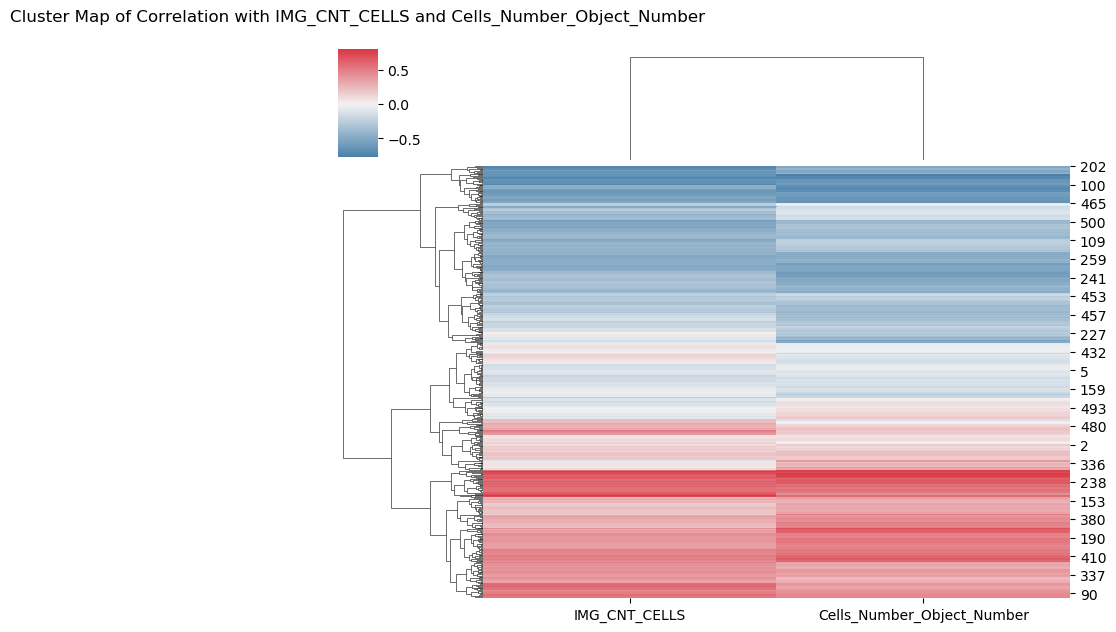

In [27]:
# Extract correlations of all features with 'IMG_CNT_CELLS' and 'Cells_Number_Object_Number'
columns_of_interest = ["IMG_CNT_CELLS", "Cells_Number_Object_Number"]
correlation_with_target = correlation_matrix_combined[columns_of_interest].iloc[:-2]  # Exclude the last two rows to avoid self-correlation

# Define a color map with 0 as the center
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the clustermap
sns.clustermap(
    correlation_with_target,
    cmap=cmap,
    center=0,  # Center the colormap at 0
    fmt=".2f",
    figsize=(8, 6)
)
plt.title("Cluster Map of Correlation with IMG_CNT_CELLS and Cells_Number_Object_Number", pad=20)
plt.show()

In [22]:
correlation_with_target

,IMG_CNT_CELLS,Cells_Number_Object_Number
0,0.473403,0.523433
1,0.595017,0.571522
2,0.092962,0.155612
3,0.384351,0.556490
4,0.043270,-0.053720
...,...,...
507,0.593721,0.558029
508,0.567651,0.671650
509,-0.103924,-0.232358
510,0.394767,0.539469


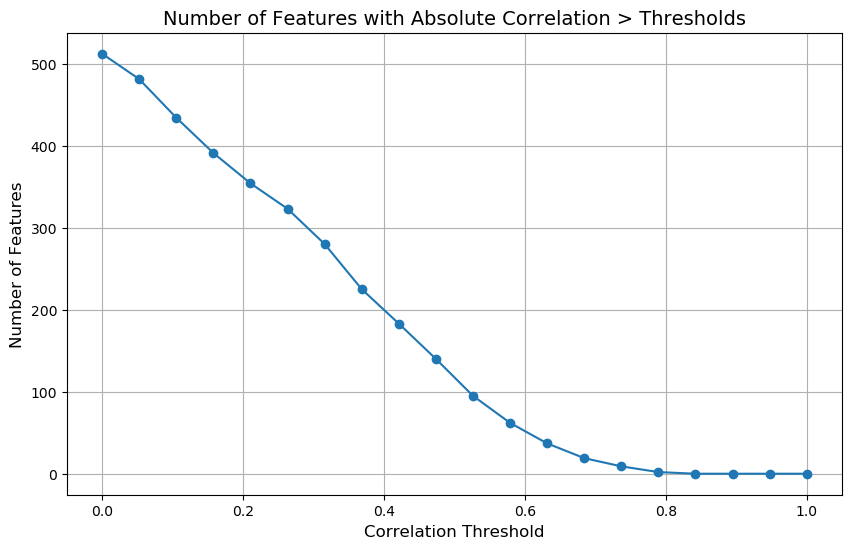

In [31]:
# Define thresholds
thresholds = np.linspace(0, 1, 20)  # 20 thresholds from 0 to 1

# Calculate the number of features with absolute correlation > thresholds
num_features_above_threshold = [
    (correlation_with_target[["Cells_Number_Object_Number"]].abs() > threshold).sum().sum() for threshold in thresholds
]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, num_features_above_threshold, marker="o")
plt.title("Number of Features with Absolute Correlation > Thresholds", fontsize=14)
plt.xlabel("Correlation Threshold", fontsize=12)
plt.ylabel("Number of Features", fontsize=12)
plt.grid(True)
plt.show()